# Exploratory Data Analysis

## 1. Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

## 2. Reading data

In [30]:
df = pd.read_parquet(r"..\Data\cleaned_parquet\final\P5_final_new.parquet")
df.head()

,uid,title,journal,abstract,authors,affiliations,mesh_terms,keywords,coi_statement,parsed_date,...,cleaned_title_tokens_hf,cleaned_abstract_tokens_simple,cleaned_abstract_tokens_hf,disease_title_tokens_simple,disease_title_tokens_hf,disease_abstract_tokens_simple,disease_abstract_tokens_hf,disease_abstract_spacy,disease_title_spacy,disease_mesh_terms_spacy
0,10186596,The potential impact of health care reform on ...,Journal of public health management and practi...,"General: This article observes that, despite t...",Auerbach J; McGuire J,"HIV/AIDS Bureau, Massachusetts Department of P...","Financing, Government; HIV Infections; Health ...",,N/A,1995-01-01,...,"[[CLS], potential, impact, health, care, refor...","[general, article, observes, despite, clear, p...","[[CLS], general, article, observes, despite, c...",[hiv],[hiv],"[hiv, aids]","[hiv, aids]","[human immunodeficiency virus (HIV) disease, a...",[],[HIV Infections]
1,10186588,New Jersey health promotion and disease preven...,Journal of public health management and practi...,General: Health promotion is a major component...,Louria D B,Department of Preventive Medicine and Communit...,Female; Health Education; Health Promotion; Hu...,,N/A,1995-01-01,...,"[[CLS], new, jersey, health, promotion, diseas...","[general, health, promotion, major, component,...","[[CLS], general, health, promotion, major, com...",[],[],[],[],[],[],[]
2,10186587,Who will provide preventive services? The chan...,Journal of public health management and practi...,General: Health care reform in the United Stat...,Pearson T A; Spencer M; Jenkins P,"Mary Imogene Bassett Research Institute, Coope...",Delivery of Health Care; Female; Health Care R...,,N/A,1995-01-01,...,"[[CLS], provide, prevent, ##ive, services, ?, ...","[general, health, care, reform, united, states...","[[CLS], general, health, care, reform, united,...",[],[],[],[],[],[],[]
3,10163501,Cytoreduction of small intestine metastases us...,Journal of gynecologic surgery,General: The Cavitron Ultrasonic Surgical Aspi...,Adelson M D,"Department of Obstetrics and Gynecology, Crous...",Adenocarcinoma; Fallopian Tube Neoplasms; Fema...,,N/A,1995-01-01,...,"[[CLS], cy, ##tore, ##duction, small, int, ##e...","[general, cavitron, ultrasonic, surgical, aspi...","[[CLS], general, ca, ##vi, ##tron, ultra, ##so...",[],[],[tumor],[tumor],"[carcinoma of the ovary, and one each had, tub...",[],"[Adenocarcinoma, Neoplasms, Ovarian Neoplasms]"
4,10157383,Racial differences in access to kidney transpl...,Health care financing review,General: Previous work has documented large di...,Eggers P W,"Office of Research and Demonstrations, Health ...",Adolescent; Adult; Black or African American; ...,Empirical Approach; End Stage Renal Disease Pr...,N/A,1995-01-01,...,"[[CLS], racial, differences, access, kidney, t...","[general, previous, work, documented, large, d...","[[CLS], general, previous, work, documented, l...",[],[],[],[],"[renal failure, renal failure, end stage renal...",[],[American Kidney Failure]


In [32]:
len(df)

1057871

In [34]:
df.columns

Index(['uid', 'title', 'journal', 'abstract', 'authors', 'affiliations',
       'mesh_terms', 'keywords', 'coi_statement', 'parsed_date',
       'cleaned_title_tokens_simple', 'cleaned_title_tokens_hf',
       'cleaned_abstract_tokens_simple', 'cleaned_abstract_tokens_hf',
       'disease_title_tokens_simple', 'disease_title_tokens_hf',
       'disease_abstract_tokens_simple', 'disease_abstract_tokens_hf',
       'disease_abstract_spacy', 'disease_title_spacy',
       'disease_mesh_terms_spacy'],
      dtype='object')

## 3. Exploratory Data Analysis

### 3.1. Journals

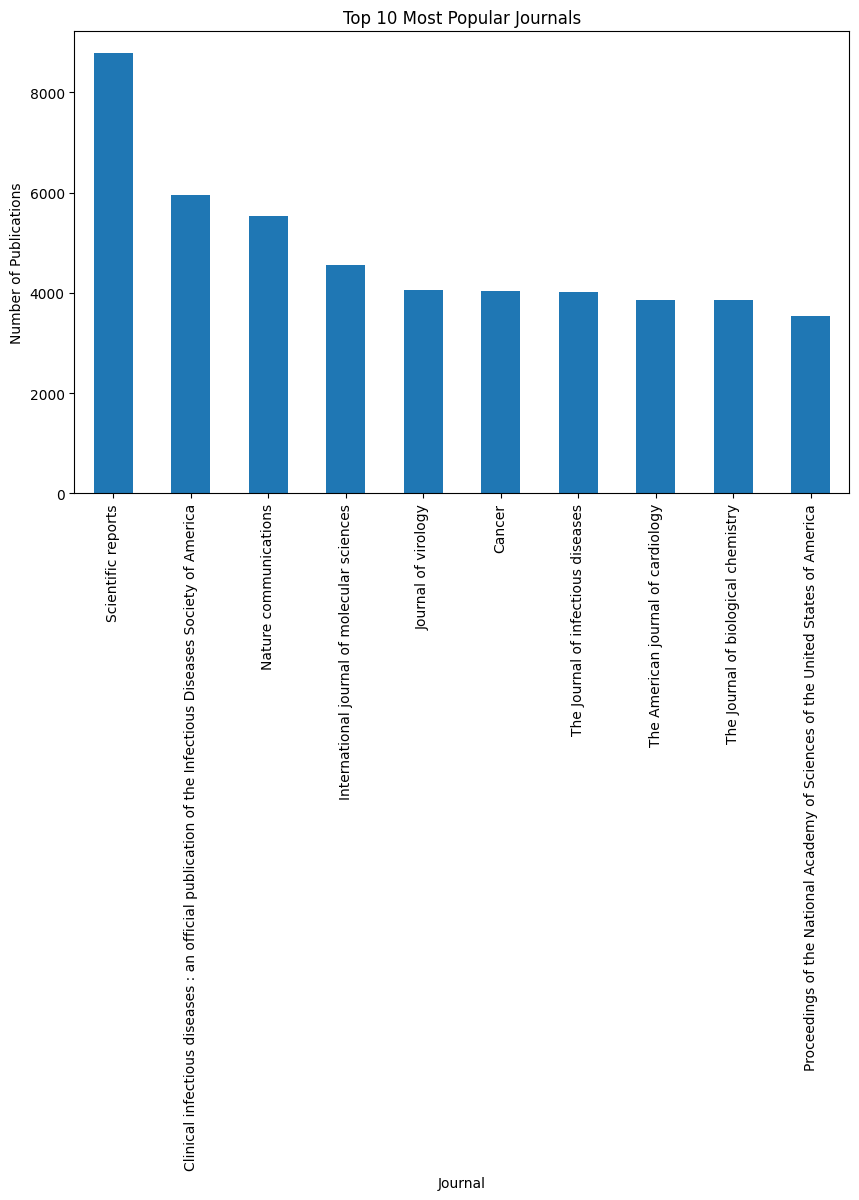

In [29]:
# Find the 8 most popular journals
top_journals = df['journal'].value_counts().head(10)

# Plot the results
top_journals.plot(kind='bar', figsize=(10, 6), title='Top 10 Most Popular Journals')
plt.xlabel('Journal')
plt.ylabel('Number of Publications')
plt.show()

As we can see, the most popular journal is "Scientific Reports" with 8,778 publications, followed by "Clinical Infectious Diseases" with 5,953 publications and "Nature Communications" with 5,537 publications. The least popular journal among the top 10 is "Proceedings of the National Academy of Sciences of the United States of America" with 3,537 publications.

### 3.2. Publication Date

#### 3.2.1. By Year

C:\Users\CarpeDiem\AppData\Local\Temp\ipykernel_11548\348828437.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  articles_per_year = articles_per_date.resample('Y').sum()


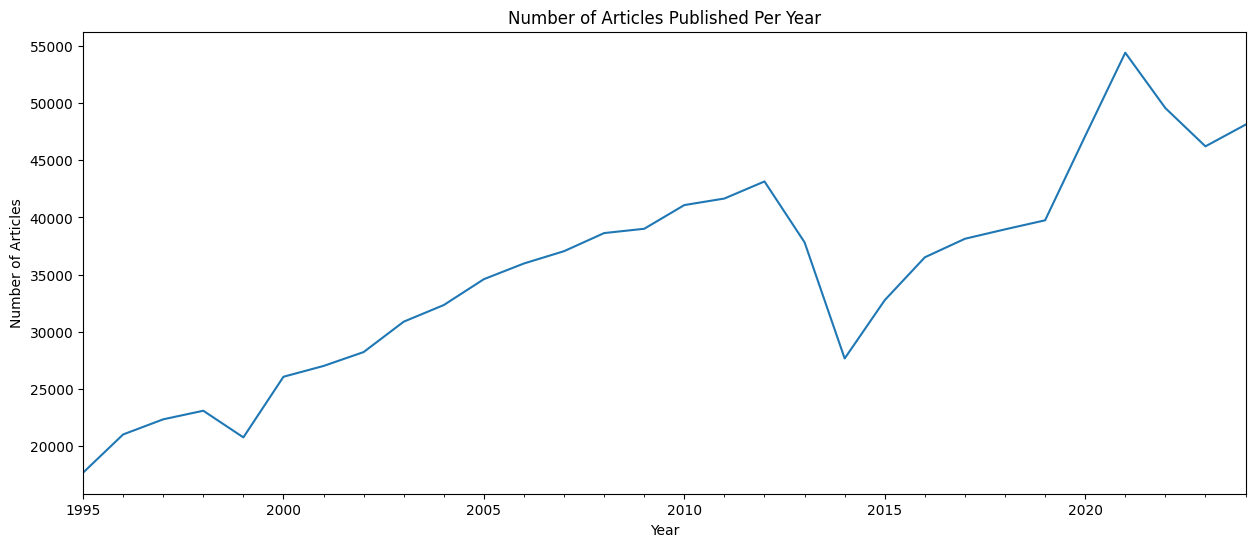

In [61]:
articles_per_date = df.groupby('parsed_date').size()

articles_per_year = articles_per_date.resample('Y').sum()

articles_per_year.plot(figsize=(15, 6), title='Number of Articles Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()

As we can observe, the number of articles published is growing over the years with some declines in 1999 and 2014. This trend indicates a rising interest and investment in research and publications.

#### 3.2.1. By Month

C:\Users\CarpeDiem\AppData\Local\Temp\ipykernel_11548\3659569912.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = articles_per_date.resample('M').sum().groupby(lambda x: x.month).mean()


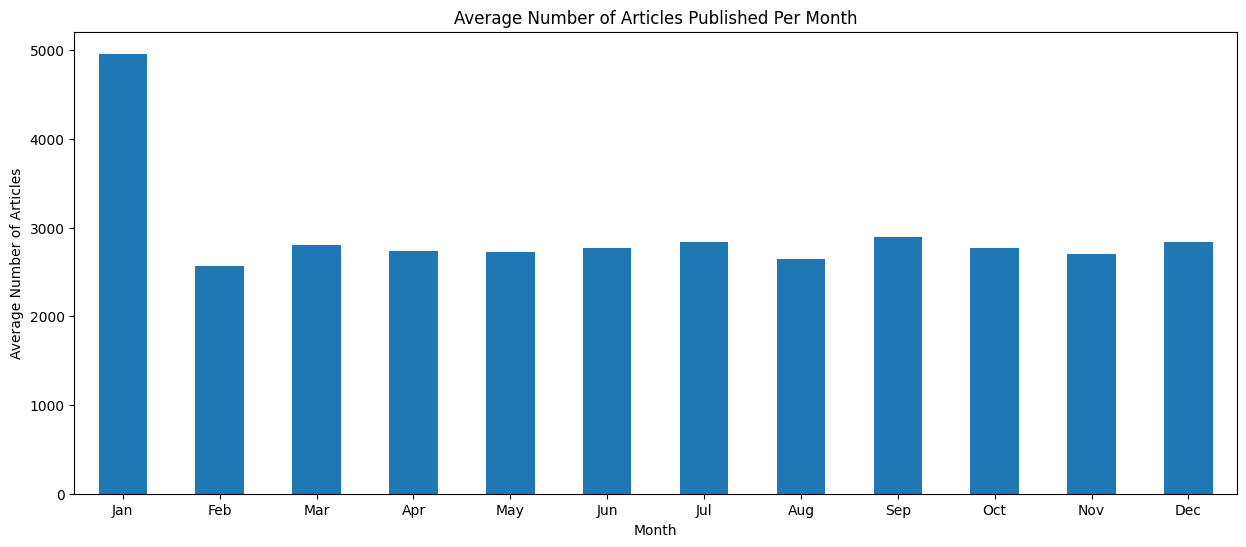

In [ ]:
monthly_avg = articles_per_date.resample('M').sum().groupby(lambda x: x.month).mean()
monthly_avg.index = monthly_avg.index.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

monthly_avg.plot(kind='bar', figsize=(15, 6), title='Average Number of Articles Published Per Month')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.ylabel('Average Number of Articles')
plt.show()

As we can observe, the most articles are published on average in January, which aligns with the conclusion from the article "April publishing lull follows end-of-year academic flurry" [1], which stated that January and November are the most popular months for publishing.

### 3.3. Authors

#### 3.3.1. Number of Authors Per Article

In [75]:
df['num_authors'] = df['authors'].apply(lambda x: len(x.split(';')))
average_num_authors = df['num_authors'].mean()
print(f"The average number of authors is {average_num_authors:.2f}")

The average number of authors is 6.54


C:\Users\CarpeDiem\AppData\Local\Temp\ipykernel_11548\3224668982.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  authors_per_year = authors_per_date.resample('Y').mean()


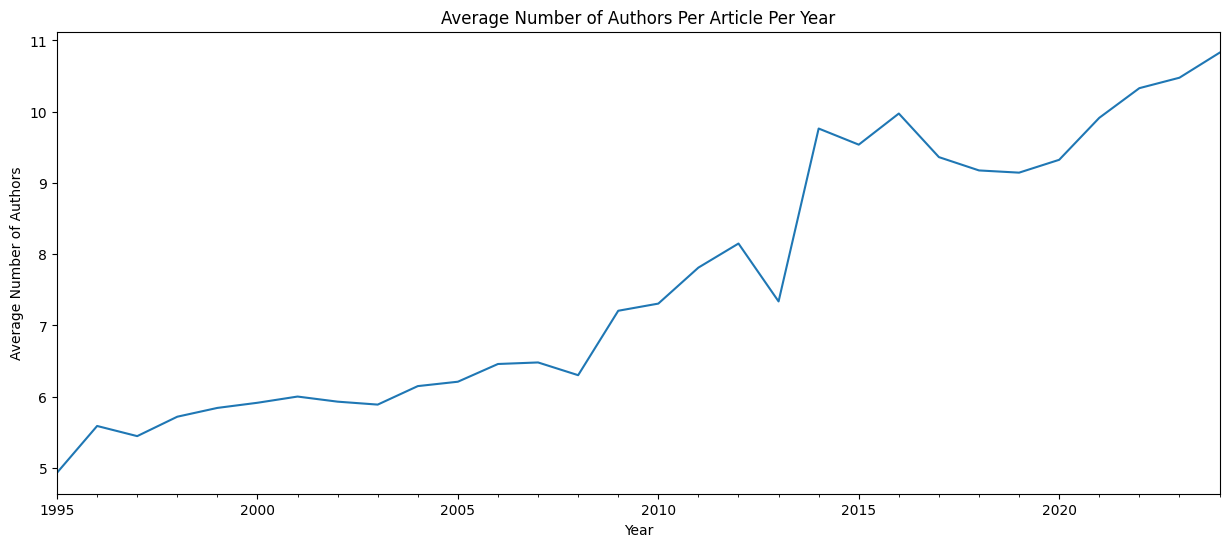

In [88]:
authors_per_date = df.groupby('parsed_date')['num_authors'].mean()

authors_per_year = authors_per_date.resample('Y').mean()

authors_per_year.plot(figsize=(15, 6), title='Average Number of Authors Per Article Per Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Authors')
plt.show()

As observed, not only is the number of articles published per year increasing, but the number of authors per article is also on the rise. Starting from an average of around 5 authors per article in 1995, it has grown to approximately 11 authors per article in 2024. The overall average number of authors per article from 1995 to 2024 is 6.54.

#### 3.3.2. Top Authors

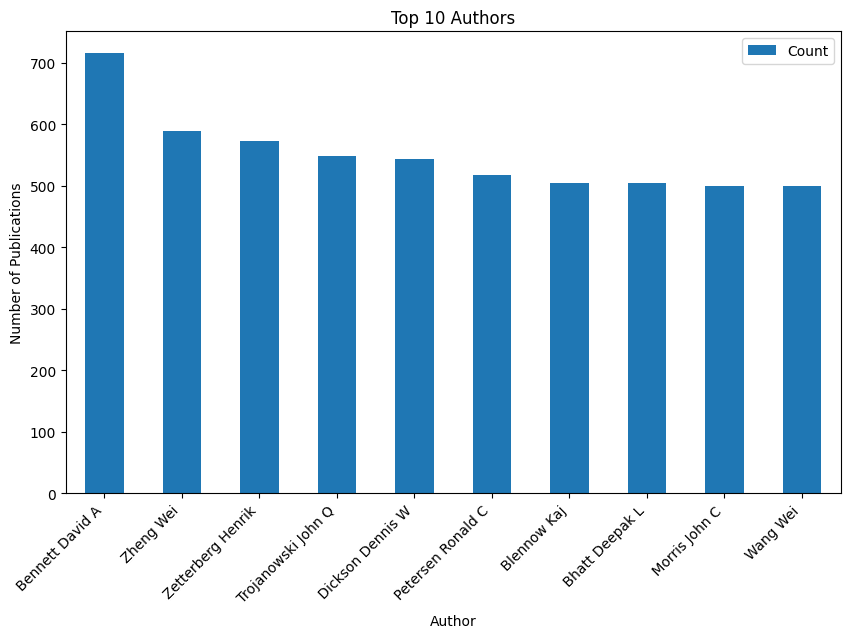

In [92]:
all_authors = df['authors'].str.split(';').explode()

author_counts = Counter(all_authors)

top_authors = author_counts.most_common(10)

top_authors_df = pd.DataFrame(top_authors, columns=['Author', 'Count'])

top_authors_df.plot(kind='bar', x='Author', y='Count', figsize=(10, 6), title='Top 10 Authors')
plt.xlabel('Author')

plt.ylabel('Number of Publications')
plt.xticks(rotation=45, ha='right')
plt.show()

As we can see, the top publisher in our dataset is David A. Bennett [2], who has a little more than 700 filtered articles with diseases. However, in his Google Scholar profile, he has 1,195 articles.

### 4. Affiliations

In [106]:
top_affiliations = df['affiliations'].str.split(';').explode()
top_affiliations = top_affiliations.str.split(',').str[0:2]
top_affiliations.value_counts().head(10).plot(kind='bar', figsize=(10, 6), title='Top 10 Affiliations')
plt.xlabel('Affiliation')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45, ha='right')
plt.show()

: 

: 

## 5. Abstracts 

In [ ]:
average_abstract_length = df['abstract'].apply(len).mean()
print(f"The average length of the abstracts is {average_abstract_length:.2f} characters.")

## Refrences

[1]  https://www.nature.com/nature-index/news/april-publishing-lull-follows-end-of-year-academic-flurry

[2] https://scholar.google.com/citations?user=m_NIro4AAAAJ&hl=en